In [65]:
import os
import math
import random
import subprocess
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
x = [1, 3, 4.5, 5.5]
y = [2.5, 3, 3, 3.5]

print('x:', x)
print('y:', y)

x: [1, 3, 4.5, 5.5]
y: [2.5, 3, 3, 3.5]


In [80]:
def cost_2(theta, x, y):
    m = np.size(y)
    return sum(1/(2*m) * np.square(h2(theta, np.array(x)) - np.array(y)))

def h2(theta, x):
    X = np.ones([len(x),len(theta)])
    X[:,1] = x
    return X.dot(theta.T)

def linear_cost_prime(hyp, theta, x, y):
    m = np.size(y)
    delta = np.zeros(np.shape(theta))
    delta[0] -= (2/float(m)) * sum((y - hyp(theta, x)))
    delta[1] -= (2/float(m)) * sum((y - hyp(theta, x)) * x)
    return delta

def gradient_descent_2(hyp, cost, cost_prime, x, y, theta, alpha, iterations, verbose=False):
    cost_history = []
    delta = np.zeros(np.shape(theta))
    for i in range(iterations):
        if verbose: print("** Iteration ", i)
        delta = cost_prime(hyp, theta, x, y)
        theta = theta - alpha * delta
        cost_history.append(cost(theta, x, y))
    return theta, cost_history

theta, cost_history = gradient_descent_2(h2, cost_2, linear_cost_prime, x, y, np.array([0, 0]), 0.05, 5000)

print("theta:",theta)

theta: [2.31521739 0.19565217]


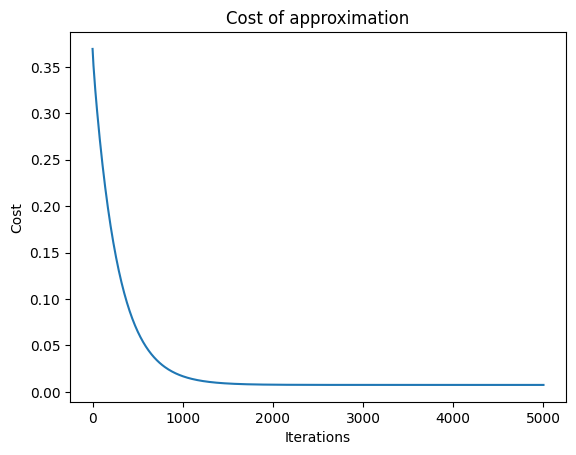

In [81]:
x_axis = np.linspace(0, 5000, 500)
plt.plot(x_axis, cost_history[5:505])
plt.title("Cost of approximation")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)
print("xmin/xmax:", "% s, %s" % (xmin, xmax))
print("ymin/ymax:", "% s, %s" % (ymin, ymax))

xmin/xmax: 1, 5.5
ymin/ymax: 2.5, 3.5


In [ ]:
img_path = 'img/'
if not os.path.exists(img_path):
    os.makedirs(img_path)
img_files = os.listdir(img_path)
for img_file in img_files:
    img_file_path = os.path.join(img_path, img_file)
    if os.path.isfile(img_file_path):
        os.remove(img_file_path)

In [83]:
cost_history_sample = cost_history.copy()[:1200]
print('Creating image files ...')
for i, t in enumerate(tqdm(cost_history_sample)):
    plt.scatter(x, y)
    plt.xlim(math.floor(xmin), math.ceil(xmax))
    plt.ylim(math.floor(ymin), math.ceil(ymax))
    a = np.linspace(xmin, xmax, 2)
    b = theta[0] + a * theta[1]
    plt.plot(a, b)
    plt.title(f'Iterations:{i:004}')
    plt.savefig(f'{img_path}{i:004}.png')
    plt.close()

Creating image files ...


100%|██████████| 1200/1200 [03:52<00:00,  5.15it/s]


In [ ]:
print('Creating image palette ...')
ffmpeg_command_create_palette = [
    'ffmpeg',
    '-y',
    '-i', f'{img_path}%04d.png',
    '-vf', 'palettegen',
    'palette.png',
]
subprocess.call(ffmpeg_command_create_palette)


print('Crating animated gif file ...')
ffmpeg_command = [
    'ffmpeg',
    '-y',
    '-i', f'{img_path}%04d.png',
    '-i', 'palette.png',
    '-filter_complex', 'fps=60,scale=600:-1:flags=lanczos[x];[x] [1:v]paletteuse',
    'gdanim.gif',
]
subprocess.call(ffmpeg_command)

print('Done!')


Creating image palette ...
Crating animated gif file ...
Done!
